# The Monty Hall Problem

#### Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

The given probabilities depend on specific assumptions about how the host and contestant choose their doors. A key insight is that, under these standard conditions, there is more information about doors 2 and 3 than was available at the beginning of the game when door 1 was chosen by the player: the host's deliberate action adds value to the door he did not choose to eliminate, but not to the one chosen by the contestant originally. Another insight is that switching doors is a different action than choosing between the two remaining doors at random, as the first action uses the previous information and the latter does not. Other possible behaviors than the one described can reveal different additional information, or none at all, and yield different probabilities. Yet another insight is that your chance of winning by switching doors is directly related to your chance of choosing the winning door in the first place: if you choose the correct door on your first try, then switching loses; if you choose a wrong door on your first try, then switching wins; your chance of choosing the correct door on your first try is 1/3, and the chance of choosing a wrong door is 2/3.

###### We are going to test this by running 10,000 simulations, or maybe less if that's all it takes.

### Test Problem
First we are going to graph the outcome of a random event that we know has a probability of 2/3, rolling a single die and getting any of the number from 1 to 4. The probability of rolling 1-4 is 4/6 = 2/3 or 2 out of 3.

###### Our graph should settle at about 66%

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

games_won = 0
avg_won = []

for games in range(1, 500):
    roll = random.randint(1,6)
    if roll >=1 and roll <=4:
        games_won += 1
    try:    
        average = games_won/games
    except:
        pass
    avg_won.append(average)


([<matplotlib.axis.YTick at 0x1ff801158c8>,
 <a list of 7 Text yticklabel objects>)

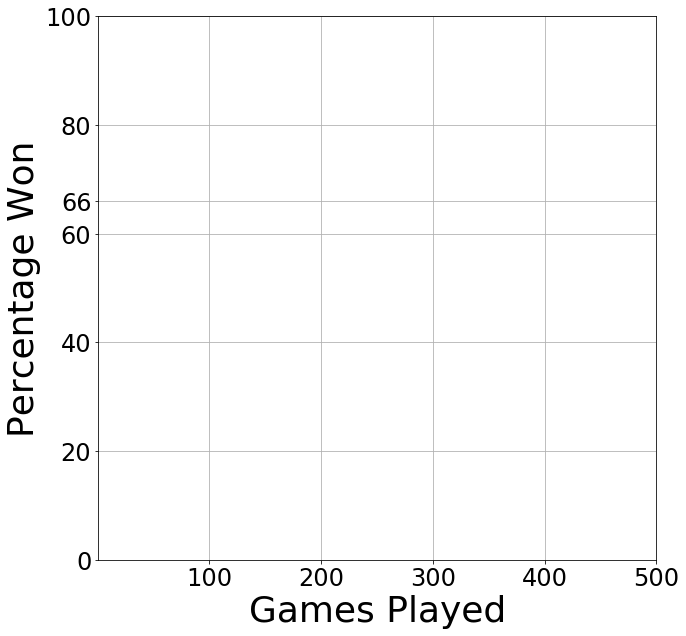

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(1, 500), ylim=(0, 1))
line, = ax.plot([], [], lw=3)

plt.xlabel('Games Played', fontsize=36)
plt.xticks(fontsize=24)
plt.grid()
plt.ylabel('Percentage Won', fontsize=36)
plt.ylim(0,1)
positions = (0, .2, .4, .6, .66, .8, 1)
labels = ('0', '20', '40', '60', '66', '80', '100')
plt.yticks(positions, labels, fontsize=24)



In [13]:
    

def init():
    line.set_data([], [])
    return line,

xdata, ydata = [],[]

def animate(i):
    x = i
    y = avg_won[i]
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=499, interval=20, blit=True)

# anim.save('Mony Hall.gif',writer='imagemagick')

HTML(anim.to_jshtml())


Animation size has reached 20987986 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


' \n\n'

## The Game Show

Now we are going to do the same type of test with the Monty Hall Problem

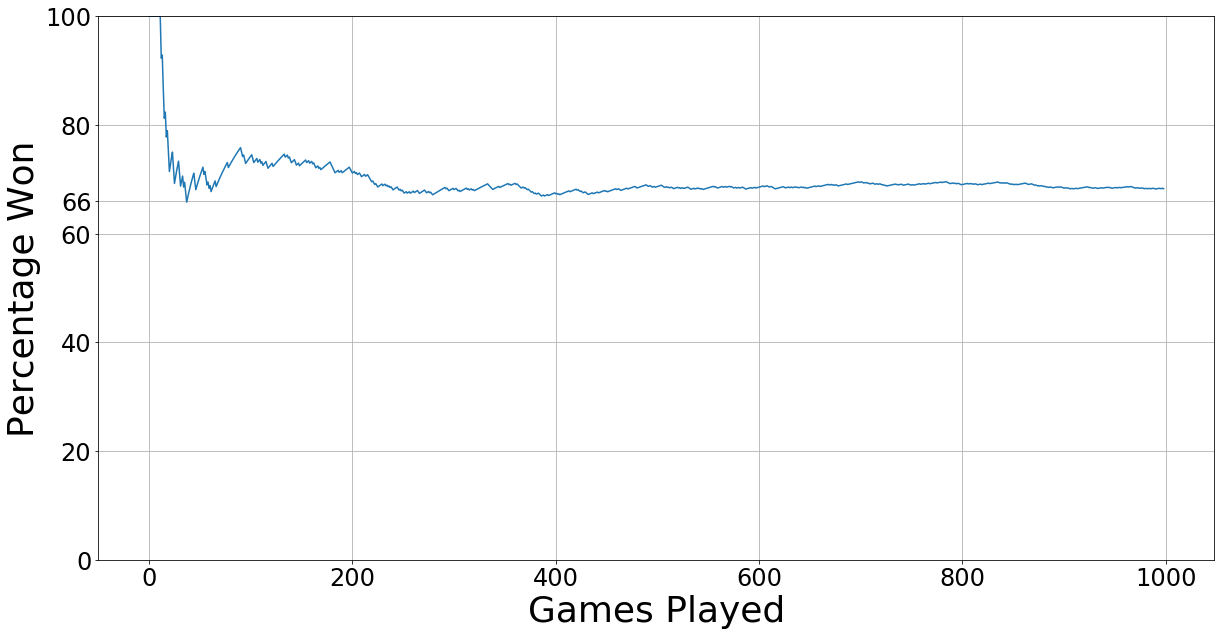

In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np

test = 1000
wins = 0
success = []

for games in range(1, test):
    the_goats = []

    the_doors = [1, 2, 3]                  # The three doors.
    
    the_car = random.randint(1,3)          # The door with the car.
    
    the_choice = random.randint(1,3)       # The first door choosen.
    
    the_goats = the_doors.copy()           # Remove the car and all that remains are goats.
    the_goats.remove(the_car)
    
    if the_goats.count(the_choice) > 0:    # The goat door can't be equal to the choice door
        the_goats.remove(the_choice)
    
    if len(the_goats) > 1:
        the_reveal = the_goats[random.randint(0, 1)]  # Reveal a goat
    else:
        the_reveal = the_goats[0]
        
    the_remaining = the_doors.copy()       # Figure out which doors remain
    the_remaining.remove(the_reveal)
    
    the_switch = the_remaining.copy()      # Switch the doors
    the_switch.remove(the_choice)
    
    if the_car == the_switch[0]:           # If the car is behind the switch door, you win!
        wins += 1
    
    success.append(wins/games)             # Calculate the average

plt.figure(figsize=(20,10))
plt.xlabel('Games Played', fontsize=36)
plt.xticks(fontsize=24)
plt.grid()
plt.ylabel('Percentage Won', fontsize=36)
plt.ylim(0,1)
positions = (0, .2, .4, .6, .66, .8, 1)
labels = ('0', '20', '40', '60', '66', '80', '100')
plt.yticks(positions, labels, fontsize=24)
art.Artist.set_animated
plt.plot(success)
plt.show()